<a href="https://colab.research.google.com/github/simonemallei/complex-systems-social-graph/blob/main/recommender_social_graph/content/notebook/Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the repository used in the notebook:

Printing the files' names in its "recommender_social_graph" directory:

In [1]:
import sys
print(sys.path)

['d:\\VS Code\\complex-systems-social-graph\\recommender_social_graph\\content\\notebook', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38', '', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\win32\\lib', 'c:\\Users\\simon\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\Pythonwin']


Importing mandatory methods for the notebook:

In [3]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import sys
import copy
sys.path.append('.')
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
from graph_creation import create_graph
from abeba_methods import simulate_epoch_updated, compute_activation
from metrics import polarisation, sarle_bimodality, disagreement
from content.metrics import feed_entropy, feed_satisfaction
from content.content_recommender import simulate_epoch_content_recommender

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Creation and print of a graph:

ENDED
Starting graph: 
  node label    opinion value
------------  ---------------
           0            0.126
           1           -0.729
           2            0.35
           3            0.164
           4            0.666
           5           -0.691
           6            0.709
           7           -0.642
           8           -0.036
           9            0.829
          10           -0.653
          11            0.209
          12            0.737
          13            0.794
          14           -0.644
          15            0.973
          16            0.096
          17            0.477
          18            0.55
          19           -0.541
          20           -0.32
          21            0.653
          22            0.68
          23           -0.056
          24           -0.608
          25            0.638
          26           -0.308
          27           -0.638
          28            0.371
          29            0.081
          30         

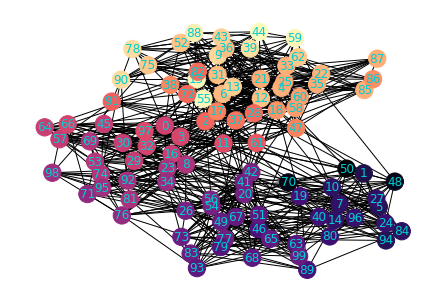

In [5]:
# create graph and update it with ABEBA model (with epsilon-error == 0.0)
G = create_graph(100, [5], avg_friend = 10, prob_post = [0.5], hp_alpha=2, hp_beta=0.3)
#G = apply_initial_feed(G)
print("ENDED")
print("Starting graph: ")
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

Simulating 100 updates of 2 graphs:
- Previous graph with no recommender
- Previous graph with random content recommender

Then showing the two graphs' opinions and their polarisation value.

ENDED COPY
Epoch	Random	Normal	Nudge	Nudge Var
0
Polarisation (RANDOM): 34.590390395460865
Bimodality (RANDOM): -0.8295131597266994
Disagreement (RANDOM - mean): 7.925795473012029
Disagreement (RANDOM - std): 4.4830968385981445
Disagreement (RANDOM - coverage): 100.0%
Entropy (RANDOM - mean): 0.0
Entropy (RANDOM - std): 0.0
Entropy (RANDOM - coverage): 50.0%
Satisfaction (RANDOM - mean): 0.43504443526500935
Satisfaction (RANDOM - std): 0.4769688102480973
Satisfaction (RANDOM - coverage): 50.0%
Polarisation (NORMAL): 23.63143245965995
Bimodality (NORMAL): -0.8760941614728225
Disagreement (NORMAL - mean): 5.411531118515663
Disagreement (NORMAL - std): 3.6185491307732955
Disagreement (NORMAL - coverage): 100.0%
Entropy (NORMAL - mean): 0.0
Entropy (NORMAL - std): 0.0
Entropy (NORMAL - coverage): 50.0%
Satisfaction (NORMAL - mean): 0.4378355861739437
Satisfaction (NORMAL - std): 0.23021930440441643
Satisfaction (NORMAL - coverage): 50.0%
Polarisation (NUDGE): 29.7311361083184
Bimodality (N

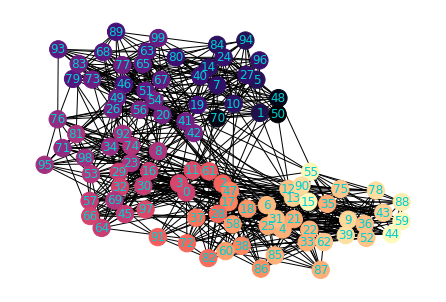

No Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1           -1
           2            0.946
           3            1
           4            0.963
           5           -1
           6            1
           7           -1
           8            1
           9            0.96
          10           -1
          11            1
          12            1
          13            1
          14           -1
          15            0.966
          16            1
          17            1
          18            1
          19           -1
          20           -1
          21            1
          22            0.962
          23            1
          24           -0.962
          25            1
          26           -1
          27           -1
          28            1
          29            1
          30            1
          31            0.965
          32            0.99
          33            0.943


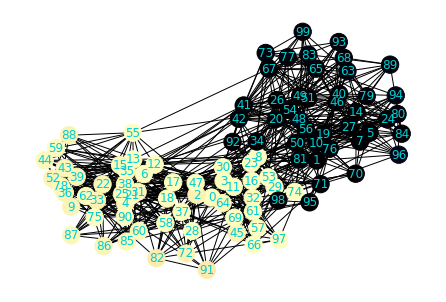

Random Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1           -1
           2            1
           3            1
           4            1
           5           -1
           6            1
           7           -1
           8            1
           9            0.928
          10           -1
          11            1
          12            1
          13            0.984
          14           -0.949
          15            0.945
          16            1
          17            1
          18            1
          19           -1
          20           -1
          21            1
          22            1
          23           -1
          24           -1
          25            0.936
          26           -1
          27           -0.954
          28            1
          29            1
          30            1
          31            1
          32            1
          33            0.949
  

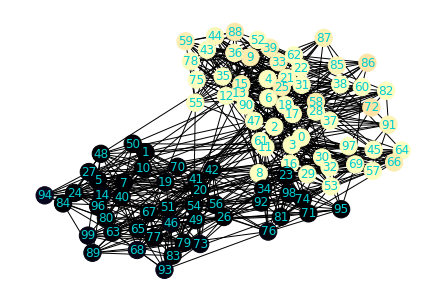

Normal Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.014
           1           -0.025
           2            0.012
           3            0.022
           4           -0.006
           5           -0.09
           6           -0.022
           7           -0.031
           8            0.012
           9            0.022
          10           -0.021
          11           -0.01
          12           -0.019
          13           -0.006
          14           -0.045
          15            0.011
          16            0.005
          17            0.006
          18            0.004
          19            0.005
          20           -0.016
          21            0.032
          22           -0.012
          23            0.037
          24           -0.018
          25            0.015
          26           -0.09
          27           -0.036
          28            0.001
          29            0.01
          30      

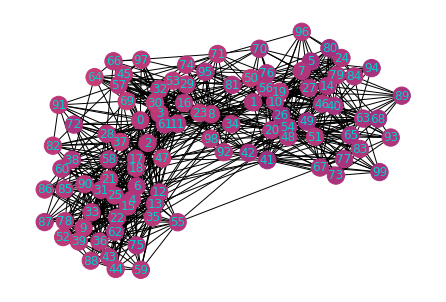

Nudge Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1           -1
           2            1
           3            1
           4            0.903
           5           -1
           6            0.956
           7           -0.905
           8            1
           9            0.89
          10           -1
          11            1
          12            0.912
          13            0.913
          14           -1
          15            0.88
          16            1
          17            1
          18            1
          19           -1
          20           -1
          21            1
          22            0.985
          23            1
          24           -0.94
          25            0.942
          26           -1
          27           -0.932
          28            0.908
          29            1
          30            0.937
          31            1
          32            0.983
    

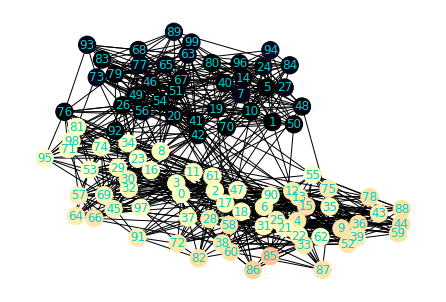

Similar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            0.947
           1           -0.886
           2            0.925
           3            0.91
           4            0.915
           5           -0.845
           6            0.927
           7           -0.878
           8           -0.832
           9            0.981
          10           -0.843
          11            0.905
          12            0.97
          13            0.957
          14           -0.89
          15            0.945
          16            0.915
          17            0.922
          18            0.908
          19           -0.83
          20           -0.835
          21            0.942
          22            0.957
          23            0.911
          24           -0.874
          25            0.926
          26           -0.863
          27           -0.859
          28            0.899
          29            0.912
          30     

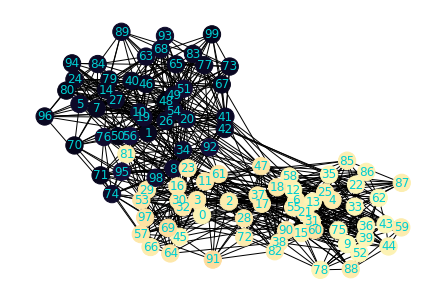

Unsimilar Recommender Nodes:
  node label    opinion value
------------  ---------------
           0            1
           1           -1
           2            1
           3            1
           4            1
           5           -1
           6            1
           7           -1
           8           -1
           9            1
          10           -1
          11            1
          12            1
          13            1
          14           -0.474
          15           -1
          16            1
          17            1
          18            1
          19           -1
          20           -1
          21            1
          22            1
          23            1
          24           -0.793
          25            1
          26           -1
          27           -1
          28            1
          29            1
          30            1
          31            1
          32            1
          33            1
          34       

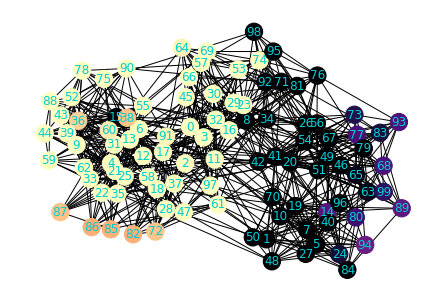

Polarisation (starting): 29.7311361083184
Bimodality (starting): -0.8058022771252971
Disagreement (starting - mean): 5.162653136367675
Disagreement (starting - std): 3.446422214452136
Entropy (starting - mean): nan
Entropy (starting - std): nan
Satisfaction (starting - mean): nan
Satisfaction (starting - std): nan
Polarisation (no recommender): 94.82665365064175
Bimodality (no recommender): -0.5630489452227951
Disagreement (no recommender - mean): -14.651303293699286
Disagreement (no recommender - std): 21.080870924793356
Entropy (no recommender - mean): nan
Entropy (no recommender - std): nan
Satisfaction (no recommender - mean): nan
Satisfaction (no recommender - std): nan
Polarisation (random recommender): 95.42312239409387
Bimodality (random recommender): -0.5318388399370054
Disagreement (random recommender - mean): -14.744042663761777
Disagreement (random recommender - std): 22.616718553014906
Entropy (random recommender - mean): 0.29820974049193816
Entropy (random recommender - s

c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\simon\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

Satisfaction (normal recommender - std): 0.04437080129151017
Polarisation (nudge recommender): 86.80099839174582
Bimodality (nudge recommender): -0.7094267200772795
Disagreement (nudge recommender - mean): -10.404111206816472
Disagreement (nudge recommender - std): 17.974063218048205
Entropy (nudge recommender - mean): 0.3373687891496832
Entropy (nudge recommender - std): 0.09227526470816563
Satisfaction (nudge recommender - mean): 0.7485695730910199
Satisfaction (nudge recommender - std): 0.1846793256106508
Polarisation (similar recommender): 78.69082889869263
Bimodality (similar recommender): -0.5463106992964313
Disagreement (similar recommender - mean): -9.02896125963573
Disagreement (similar recommender - std): 13.25445551192875
Entropy (similar recommender - mean): 0.2243014142601114
Entropy (similar recommender - std): 0.08782996157117051
Satisfaction (similar recommender - mean): 0.9016351141305482
Satisfaction (similar recommender - std): 0.027259883890603038
Polarisation (unsi

In [6]:
# Simulating an epoch and printing the opinion graph obtained
starting_G = copy.deepcopy(G)
random_G = copy.deepcopy(G)
normal_G = copy.deepcopy(G)
nudge_G = copy.deepcopy(G)
similar_G = copy.deepcopy(G)
unsimilar_G = copy.deepcopy(G)
print("ENDED COPY")
random_param = {'n_post': 1}
normal_param = {'normal_mean': 0.0, 'normal_std': 0.1, 'n_post': 1}
nudge_param = {'nudge_goal': 0.0, 'n_post': 1}
similar_param = {'similar_thresh': 0.5}
unsimilar_param = {'unsimilar_thresh': 0.5}
print(f'Epoch\tRandom\tNormal\tNudge\tNudge Var')
for i in range(100):
  G = simulate_epoch_updated(G, 0.5, epsilon = 0.1)
  random_G = simulate_epoch_content_recommender(random_G, 0.5, epsilon = 0.1,
                                                strat_param=random_param, estim_strategy="kalman")
  normal_G = simulate_epoch_content_recommender(normal_G, 0.5, epsilon = 0.1,
                                               strategy="normal", 
                                               strat_param=normal_param, estim_strategy="kalman")
  nudge_G = simulate_epoch_content_recommender(nudge_G, 0.5, epsilon = 0.1,
                                               strategy="nudge", 
                                               strat_param=nudge_param, estim_strategy="kalman")
  similar_G = simulate_epoch_content_recommender(similar_G, 0.5, epsilon = 0.1, 
                                                 strategy="similar", 
                                                 strat_param=similar_param, estim_strategy="kalman")
  unsimilar_G = simulate_epoch_content_recommender(unsimilar_G, 0.5, epsilon = 0.1, 
                                                   strategy="unsimilar",
                                                   strat_param=unsimilar_param, estim_strategy="kalman")
  print(i)
  graphs = [random_G, normal_G, nudge_G, similar_G, unsimilar_G]
  rec_text = ["RANDOM", "NORMAL", "NUDGE", "SIMILAR", "UNSIMILAR"]
  for curr_G, text in zip(graphs, rec_text):
    print(f"Polarisation ({text}): {polarisation(curr_G)}")
    print(f"Bimodality ({text}): {sarle_bimodality(curr_G)}")
    #print(f"Disagreement ({text}): {disagreement(g)}")
    disagreement_res = disagreement(curr_G)
    if not(disagreement_res == {}):
      print(f"Disagreement ({text} - mean): {np.mean(list(disagreement_res.values()))}")
      print(f"Disagreement ({text} - std): {np.std(list(disagreement_res.values()))}")
      dis_coverage = np.round(len(list(disagreement_res.values())) / len(G.nodes()) * 100, 3)
      print(f"Disagreement ({text} - coverage): {dis_coverage}%")      
    #print(f"Entropy ({text}): {feed_entropy(g)}")
    entropy_res = feed_entropy(curr_G)
    if not(entropy_res == {}):
      print(f"Entropy ({text} - mean): {np.mean(list(entropy_res.values()))}")
      print(f"Entropy ({text} - std): {np.std(list(entropy_res.values()))}")
      entr_coverage = np.round(len(list(entropy_res.values())) / len(G.nodes()) * 100, 3)
      print(f"Entropy ({text} - coverage): {entr_coverage}%")     
    #print(f"Satisfaction ({text}): {feed_satisfaction(g)}")
    satisfaction_res = feed_satisfaction(curr_G)
    if not(satisfaction_res == {}):
      print(f"Satisfaction ({text} - mean): {np.mean(list(satisfaction_res.values()))}")
      print(f"Satisfaction ({text} - std): {np.std(list(satisfaction_res.values()))}")
      sat_coverage = np.round(len(list(satisfaction_res.values())) / len(G.nodes()) * 100, 3)
      print(f"Satisfaction ({text} - coverage): {sat_coverage}%")      


# Showing starting graph and its nodes' opinions
colors = list(nx.get_node_attributes(starting_G, 'opinion').values())
labels =  nx.get_node_attributes(starting_G, 'opinion')
print("Starting Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Starting Graph:")
nx.draw(starting_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()


# Showing graph with no recommender and its nodes' opinions
colors = list(nx.get_node_attributes(G, 'opinion').values())
labels =  nx.get_node_attributes(G, 'opinion')
print("No Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("No Recommender Graph:")
nx.draw(G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with random content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(random_G, 'opinion').values())
labels =  nx.get_node_attributes(random_G, 'opinion')
print("Random Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Random Recommender Graph:")
nx.draw(random_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with normal content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(normal_G, 'opinion').values())
labels =  nx.get_node_attributes(normal_G, 'opinion')
print("Normal Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Normal Recommender Graph:")
nx.draw(normal_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with nudge content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(nudge_G, 'opinion').values())
labels =  nx.get_node_attributes(nudge_G, 'opinion')
print("Nudge Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Nudge Recommender Graph:")
nx.draw(nudge_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with similar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(similar_G, 'opinion').values())
labels =  nx.get_node_attributes(similar_G, 'opinion')
print("Similar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Similar Recommender Graph:")
nx.draw(similar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

# Showing graph with unsimilar content recommender and its nodes' opinions
colors = list(nx.get_node_attributes(unsimilar_G, 'opinion').values())
labels =  nx.get_node_attributes(unsimilar_G, 'opinion')
print("Unsimilar Recommender Nodes:")
print(tabulate([[key] + [np.round(val, 3)] for key, val in labels.items()], headers=["node label", "opinion value"]))
print("Unsimilar Recommender Graph:")
nx.draw(unsimilar_G, labels= dict([index for index in enumerate(labels)]), node_color=colors, font_color='darkturquoise', vmin=-1, vmax=1, cmap = plt.cm.get_cmap('magma'))
plt.show()

graphs = [starting_G, G, random_G, normal_G, nudge_G, similar_G, unsimilar_G]
rec_text = ["starting", "no recommender", "random recommender", "normal recommender",
            "nudge recommender", "similar recommender", 
            "unsimilar recommender"]
for g, text in zip(graphs, rec_text):
  print(f"Polarisation ({text}): {polarisation(g)}")
  print(f"Bimodality ({text}): {sarle_bimodality(g)}")
  print(f"Disagreement ({text} - mean): {np.mean(list(disagreement(g).values()))}")
  print(f"Disagreement ({text} - std): {np.std(list(disagreement(g).values()))}")
  print(f"Entropy ({text} - mean): {np.mean(list(feed_entropy(g).values()))}")
  print(f"Entropy ({text} - std): {np.std(list(feed_entropy(g).values()))}")
  print(f"Satisfaction ({text} - mean): {np.mean(list(feed_satisfaction(g).values()))}")
  print(f"Satisfaction ({text} - std): {np.std(list(feed_satisfaction(g).values()))}")